In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# integration time and time sampling
t_final = 500
delta_t = 0.001

# The parameters theta and sigma
theta = 0.3
sigma = 0.1

# The time array1 of the trajectory1
time = np.arange(0, t_final, delta_t)

# Initialise the array1 y1
y1 = np.zeros(time.size)

# Generate a Wiener process
dw = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = time.size)

# Integrate the process
for i in range(1,time.size):
    y1[i] = y1[i-1] - theta*y1[i-1]*delta_t + sigma*dw[i]

# integration time and time sampling
t_final = 500
delta_t = 0.001

# The parameters theta and sigma
theta = 0.3
sigma = 0.1

# The time array of the trajectory
time = np.arange(0, t_final, delta_t)

# Initialise the array y
y2 = np.zeros(time.size)

# Generate a Wiener process
dw = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = time.size)

# Integrate the process
for i in range(1,time.size):
    y2[i] = y2[i-1] - theta*y2[i-1]*delta_t + sigma*dw[i]

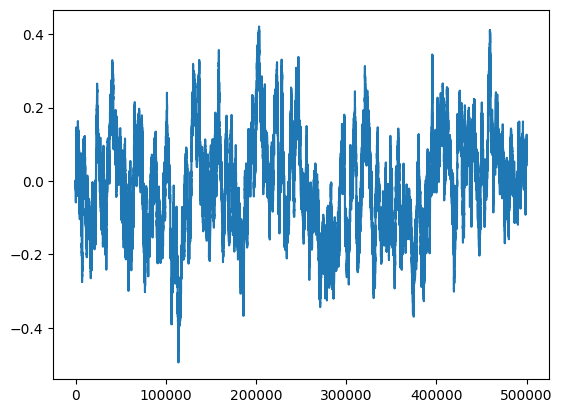

In [3]:
plt.plot(y1)

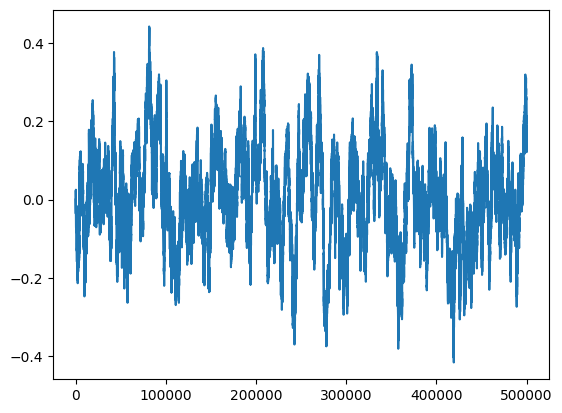

In [4]:
plt.plot(y2)

(array([   729.,   4088.,  24496.,  78005., 111712., 122521., 100398.,
         41458.,  14024.,   2569.]),
 array([-0.49418385, -0.40266249, -0.31114114, -0.21961978, -0.12809842,
        -0.03657707,  0.05494429,  0.14646564,  0.237987  ,  0.32950836,
         0.42102971]),
 <BarContainer object of 10 artists>)

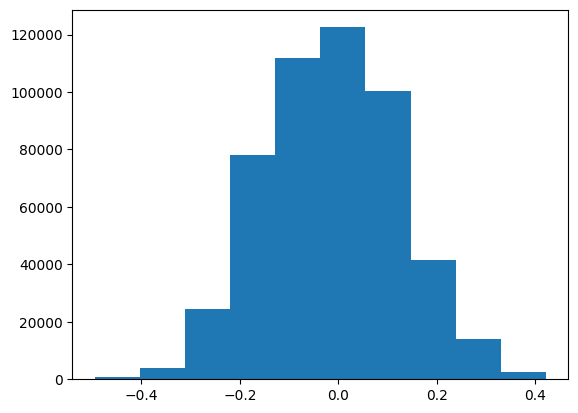

In [8]:
plt.hist(y1)

In [9]:
def surr(y1):
    ts_fourier = np.fft.rfft(y1)
    random_phases = np.exp(np.random.uniform(0, np.pi, int(len(y1)/2)+1)*1.0j)
    ts_fourier_new = ts_fourier*random_phases
    new_ts = np.fft.irfft(ts_fourier_new)
    return new_ts

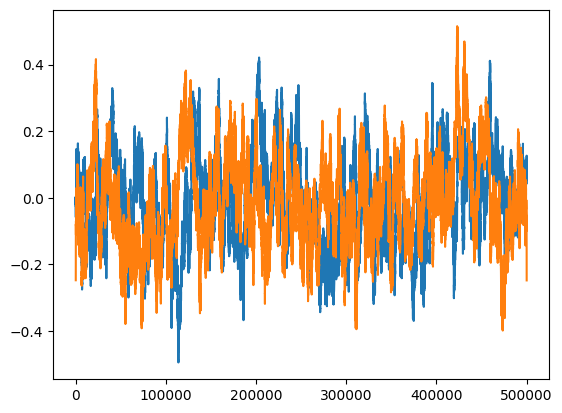

In [10]:
plt.plot(y1)
plt.plot(surr(y1))

(array([   729.,   4088.,  24496.,  78005., 111712., 122521., 100398.,
         41458.,  14024.,   2569.]),
 array([-0.49418385, -0.40266249, -0.31114114, -0.21961978, -0.12809842,
        -0.03657707,  0.05494429,  0.14646564,  0.237987  ,  0.32950836,
         0.42102971]),
 <BarContainer object of 10 artists>)

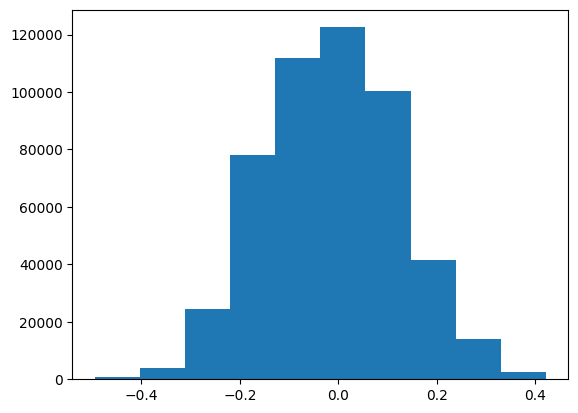

In [11]:
plt.hist(y1)

(array([  2290.,   7303.,  37559., 104477., 135298., 103673.,  65206.,
         30100.,  12093.,   2001.]),
 array([-0.42198931, -0.33215639, -0.24232347, -0.15249054, -0.06265762,
         0.02717531,  0.11700823,  0.20684115,  0.29667408,  0.386507  ,
         0.47633993]),
 <BarContainer object of 10 artists>)

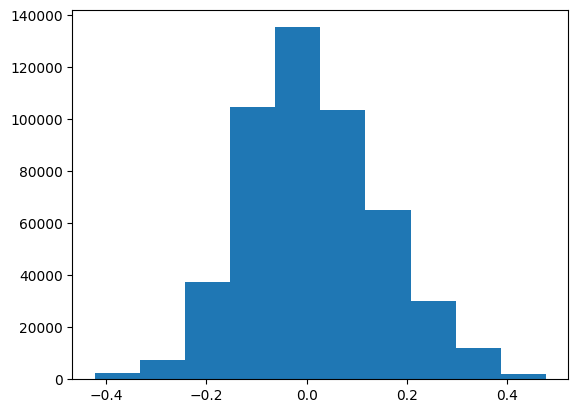

In [12]:
plt.hist(surr(y1))

In [13]:
from numpy import random

In [14]:
def chi_test1(y1):
    bt=range(10,500,20)
    f=[]
    ss=[]
    for t in range(10,500,20):
        c,b=np.histogram(y1,bins=t,density=True)
        sy1=surr(y1)
        ss.append(sy1)
        cs,bs=np.histogram(sy1,bins=t,density=True)
        gaussian = random.normal(np.mean(y1),np.std(y1),len(y1))
        f.append(np.mean(((cs-c)**2)/c))
    nbins=bt[np.argmin(f)]
    fss=ss[np.argmin(f)]
    return bt,f,nbins,fss

In [ ]:
y1

In [15]:
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)
from scipy.optimize import curve_fit
# expected=(1,.2,250,2,.2,125)

params,cov=curve_fit(bimodal,np.arange(0,100),np.histogram(y1,bins=100,density=True)[0])


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

In [ ]:
params

array([39.41887477, -6.66448589, -0.94635233, 48.63431862, 11.28591162,
        3.55768487])

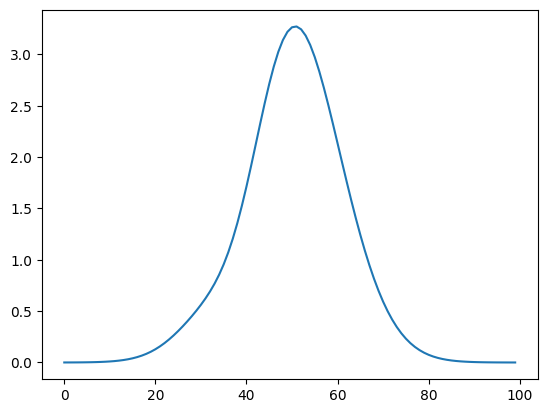

In [ ]:
x=np.arange(100)
plt.plot(x,bimodal(x,*params))

In [ ]:
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)
from scipy.optimize import curve_fit
def chi_test2(y1):
    bt=range(100,1000,20)
    f=[]
    ss=[]
    for t in range(100,1000,20):
        c,b=np.histogram(y1,bins=t,density=True)
        # print(len(b))
        # sy1=surr(y1)
        # ss.append(sy1)
        x=np.arange(0,t)
        params,cov=curve_fit(bimodal,x,np.histogram(y1,bins=t,density=True)[0])
        cs=bimodal(x,*params)
        # gaussian = random.normal(np.mean(y1),np.std(y1),len(y1))
        f.append(np.mean(((cs-c)**2)/c))
    # nbins=bt[np.argmin(f)]
    # fss=ss[np.argmin(f)]
    return bt,f


In [ ]:
b,f=chi_test2(y1)

C:\Users\Sina Roshandell\AppData\Local\Temp\ipykernel_21908\1106521451.py:20: RuntimeWarning: divide by zero encountered in divide
  f.append(np.mean(((cs-c)**2)/c))


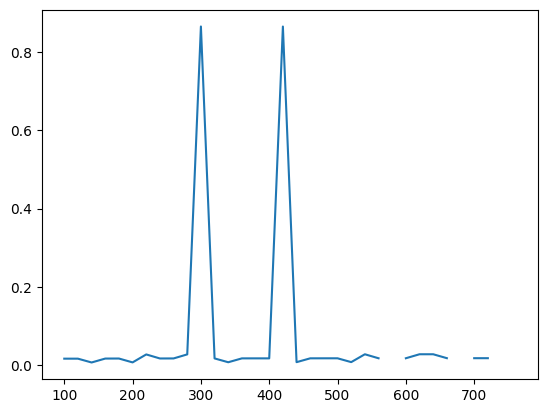

In [ ]:
plt.plot(b,f)

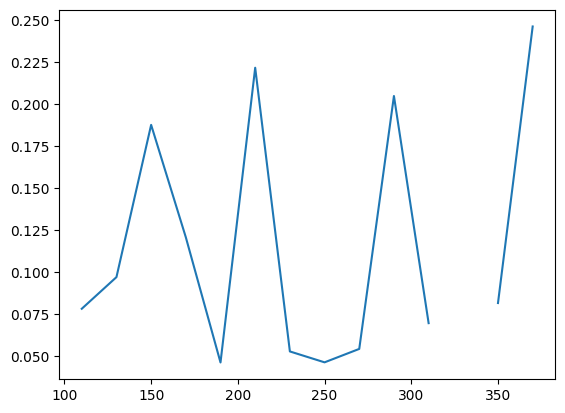

In [12]:
plt.plot(b[-20:],f[-20:])

In [17]:
def Graph_Shirazi(y1):
    import networkx as nx
    b,f,n,sury1=chi_test1(y1)
    o=[]
    oo=[]
    yy1=sury1
    dx = (max(yy1) - min(yy1))/(n)
    Data=yy1-np.min(yy1)
    # print(len(Data))
    # print(len(yy1))
    # print(len(range(1,len(Data))))
    for i in range(1,len(yy1)):
        R2= int(Data[i]/dx)
        R1= int(Data[i-1]/dx)
        o.append((R1,R2))
        oo.append(R1)
    G=nx.MultiDiGraph()
    G.add_nodes_from(oo)
    G.add_edges_from(o)
    print(len(o))
    print(len(oo))
    print(n)
    print(len(np.unique(o)))
    return G

In [18]:
G=Graph_Shirazi(y2)

C:\Users\Sina Roshandell\AppData\Local\Temp\ipykernel_26212\2262036163.py:11: RuntimeWarning: divide by zero encountered in divide
  f.append(np.mean(((cs-c)**2)/c))


499999
499999
410
411


In [20]:
G.number_of_nodes()

411

In [21]:
import networkx as nx

In [23]:
nx.write_gexf(G,'a.gexf')

In [24]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

In [26]:
degrees = [G.degree(n) for n in G.nodes()]

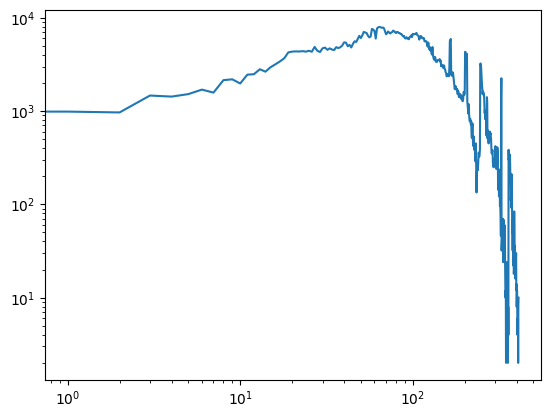

In [27]:
plt.loglog(degrees)

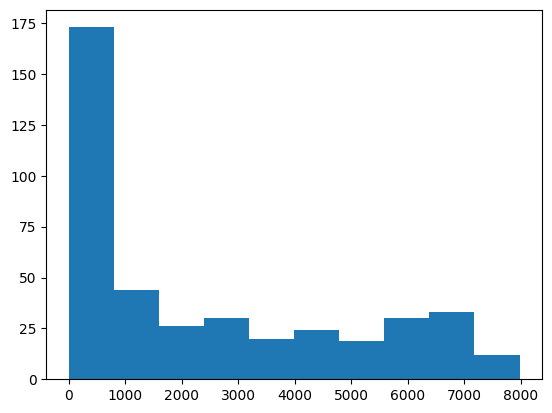

In [25]:
plot_degree_dist(G)